In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/patel-mark/Weekly-Data-Science-projects/refs/heads/main/Predictin-%20Air-Quality-Index-using-Python/AQI-and-Lat-Long-of-Countries.csv')
df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [3]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


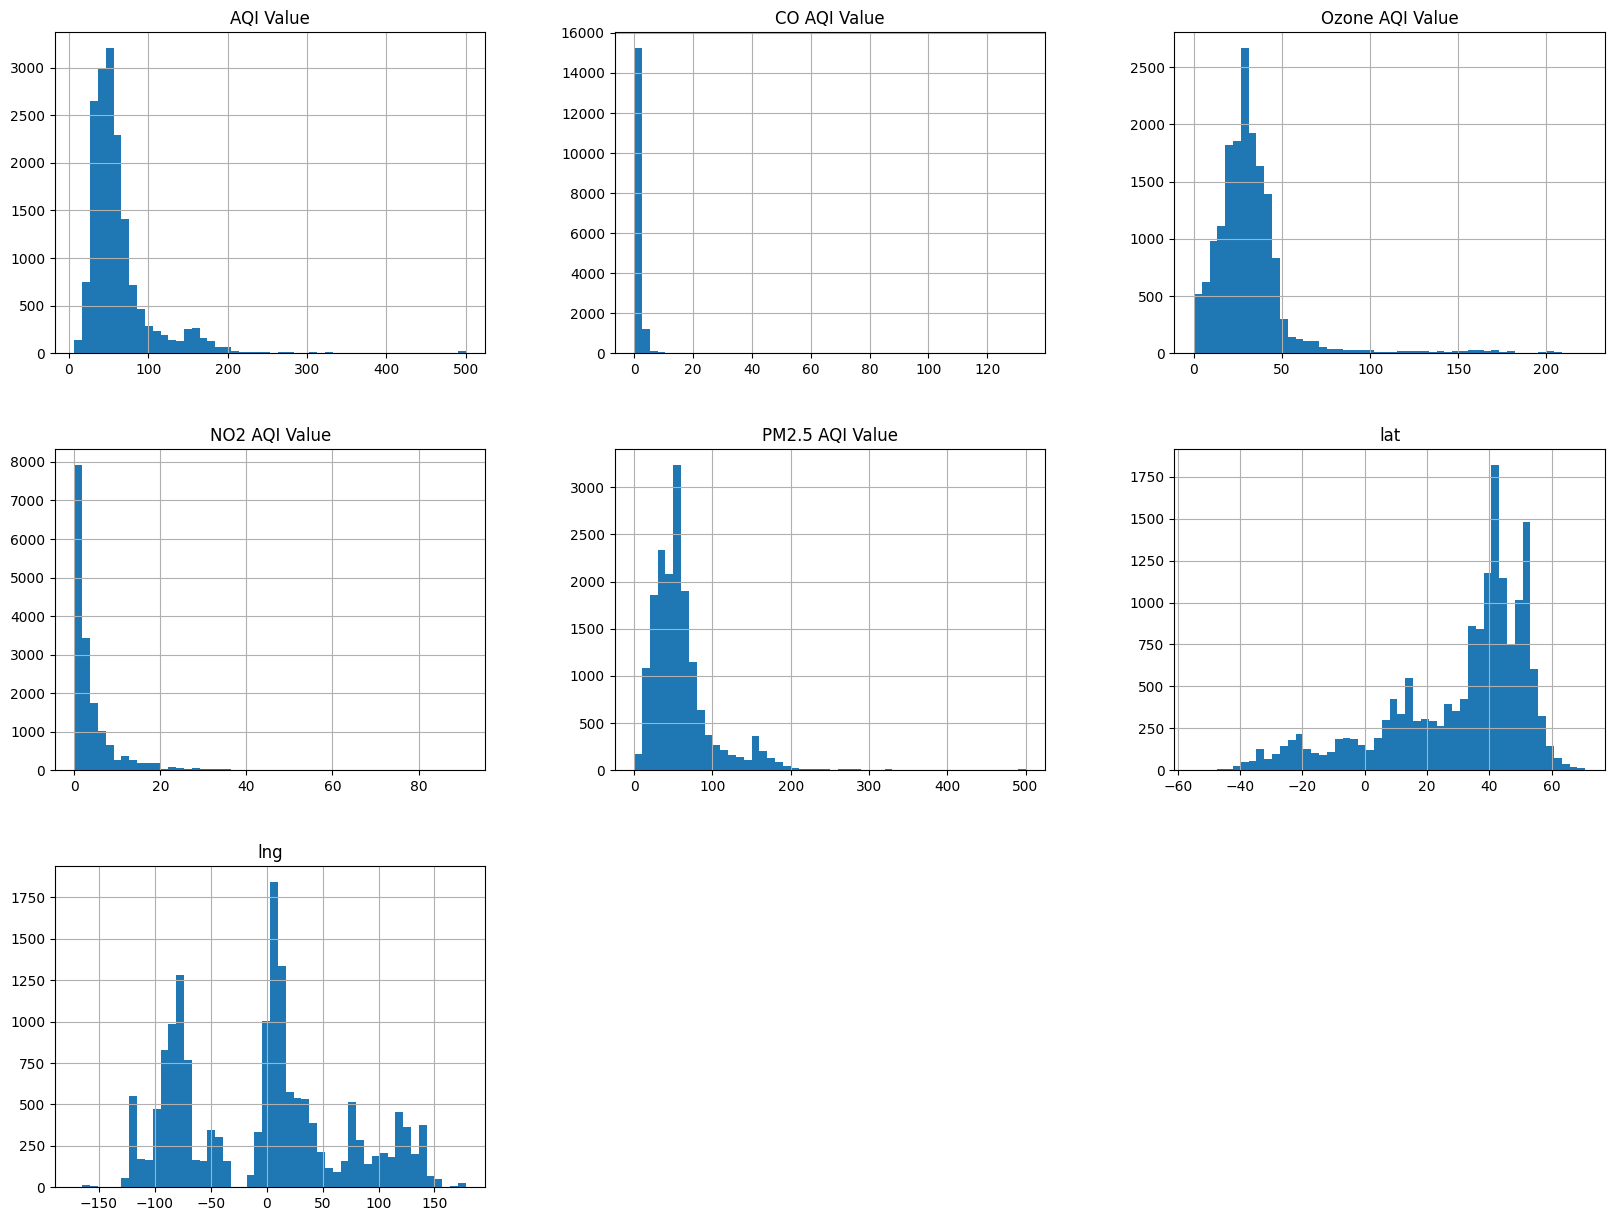

In [5]:
df.hist(bins=50,figsize=(20,15))
plt.show()

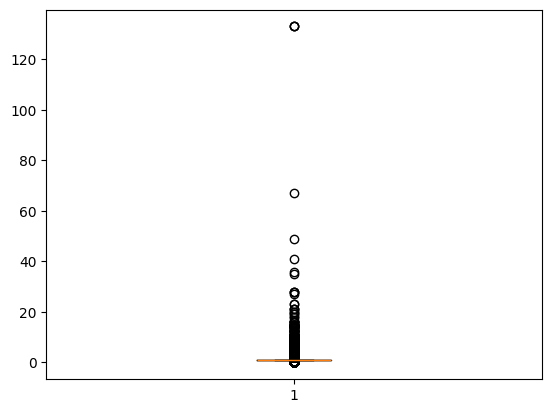

In [6]:
plt.boxplot(df['CO AQI Value'])
plt.show()

In [7]:
from scipy.stats import zscore
z_score=np.abs(zscore(df))
threshold=3

df=df[(z_score<threshold).all(axis=1)]

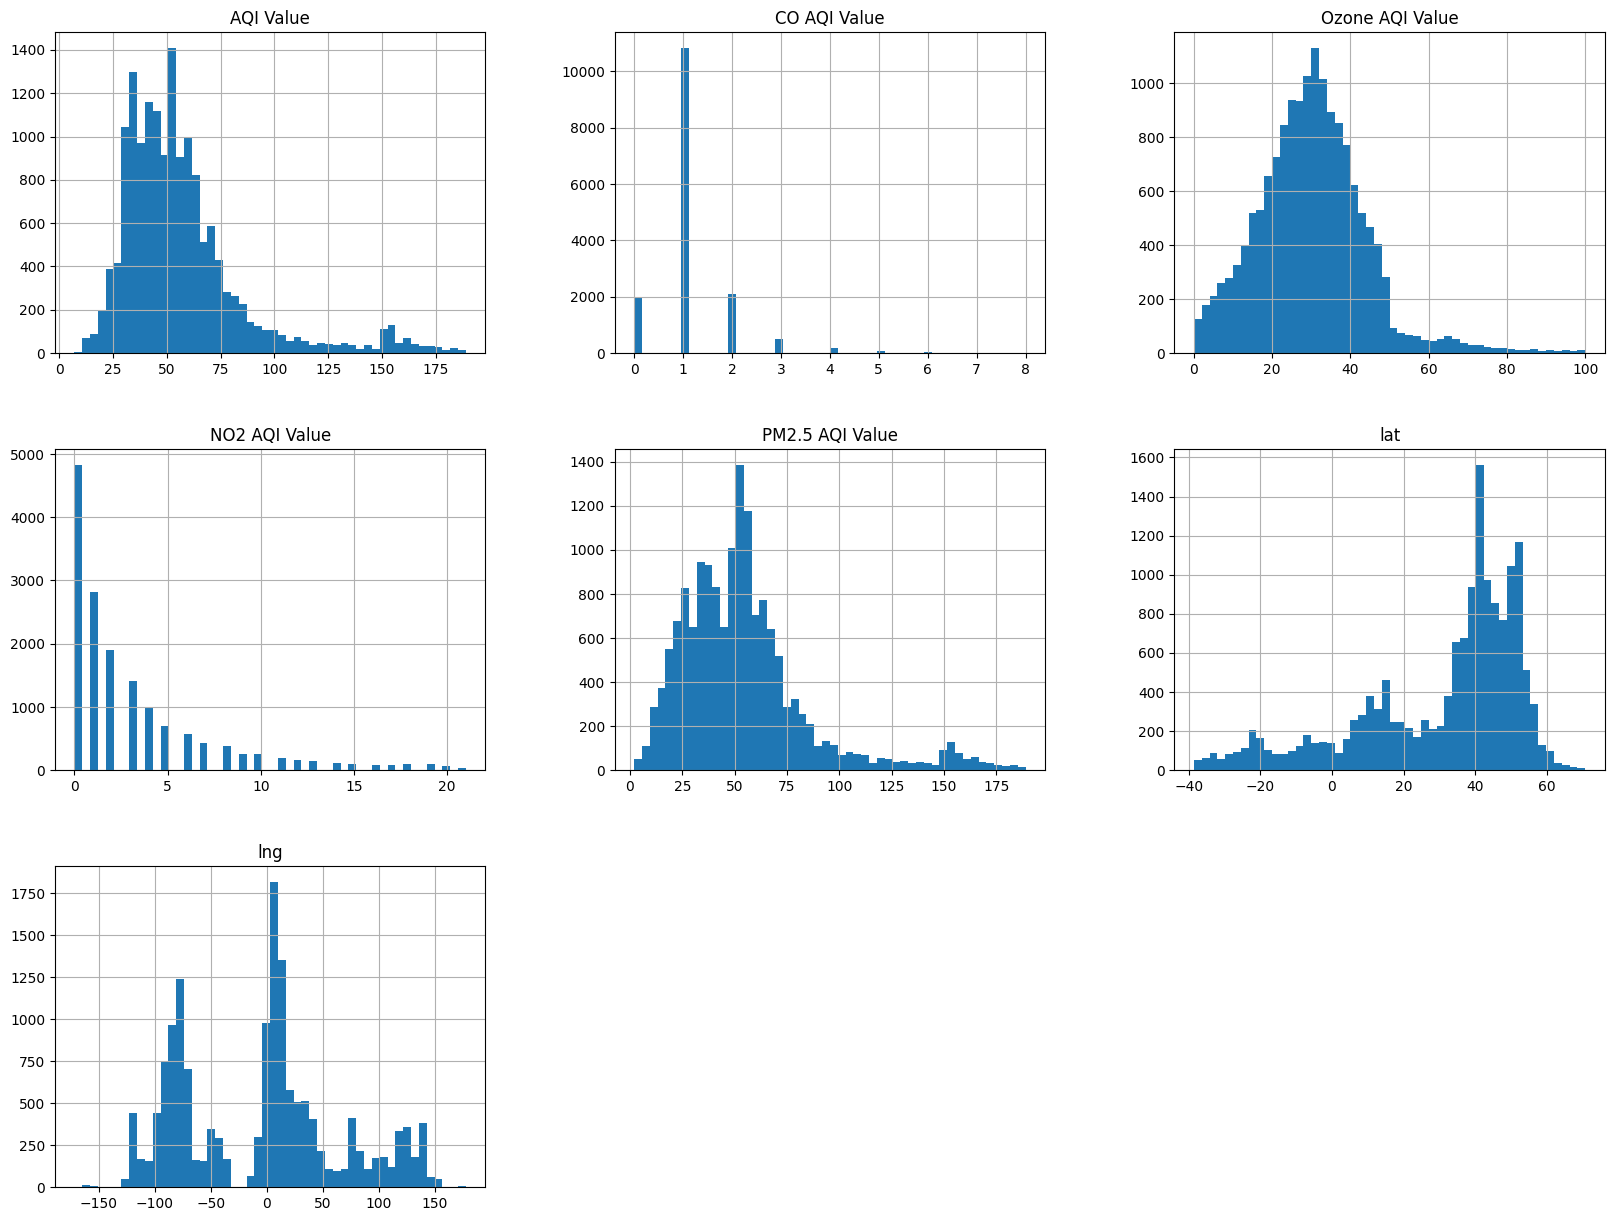

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

## Model 

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [10]:
x=df.drop(columns=["AQI Value"],axis=1)
y=df["AQI Value"]

x_train,x_temp,y_train,y_temp=train_test_split(x,y,
                                              random_state=1111,
                                              test_size=0.4)

x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,
                                          random_state=1111,
                                          test_size=0.2)

In [11]:
from sklearn.pipeline import Pipeline

pipeline_rf=Pipeline([('scaler',StandardScaler()),
                  ('rf',RandomForestRegressor())])

pipeline_ad=Pipeline([('scaler',StandardScaler()),
                  ('Ad',AdaBoostRegressor())])

pipeline_lr=Pipeline([('scaler',StandardScaler()),
                  ('lr',LinearRegression())])

pipeline_xgb=Pipeline([('scaler',StandardScaler()),
                  ('xgboost',XGBRegressor())])


In [12]:
kf=KFold(n_splits=3,shuffle=True,random_state=1111)

### Xgboost

In [13]:
param_grid_xgb = {
    'xgboost__n_estimators': [50, 100], 
    'xgboost__max_depth': [3, 5],          
    'xgboost__learning_rate': [0.01, 0.1]
}

In [14]:
gridsearch_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring='neg_mean_absolute_error',  
    cv=kf,
    n_jobs=-1,
    verbose=2
)

In [15]:
gridsearch_xgb.fit(x_train,y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=1111, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgboost',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=N...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgboost__learning_rate': [0.01, 0.1],
                         'xgboost__max_depth': [3, 5],
                         'xgboost__n_estimators': [50, 100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [16]:
best_xgb_model=gridsearch_xgb.best_estimator_

In [17]:
prediction_xgb=best_xgb_model.predict(x_val)
mae_xgb=mean_absolute_error(prediction_xgb,y_val)
print(mae_xgb)

0.17895677794712717


### RandomForest

In [18]:
param_grid_rf = {
    'rf__n_estimators': [50, 100,200], 
    'rf__max_depth': [None, 10,20],      
    'rf__min_samples_split': [2, 5,7] 
}

In [19]:
gridsearch_rf=GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=kf,
    n_jobs=-1,
    verbose=2
)

In [20]:
gridsearch_rf.fit(x_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=1111, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_split': [2, 5, 7],
                         'rf__n_estimators': [50, 100, 200]},
             verbose=2)

In [21]:
best_rf_model=gridsearch_rf.best_estimator_

In [22]:
prediction_rf=best_rf_model.predict(x_val)
mae_rf=mean_absolute_error(y_val,prediction_rf)
print(mae_rf)

0.03645866454689987


### LinearRegression

In [23]:
param_grid_lr = {
    'lr__fit_intercept': [True, False], 
    'lr__copy_X': [True, False]           
}

In [24]:
gridsearch_ad=GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=kf,
    n_jobs=-1,
    verbose=2
)

In [25]:
gridsearch_ad.fit(x_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=1111, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__copy_X': [True, False],
                         'lr__fit_intercept': [True, False]},
             verbose=2)

In [26]:
best_lr_model=gridsearch_ad.best_estimator_
prediction_lr=best_lr_model.predict(x_val)

mae_lr=mean_absolute_error(y_val,prediction_lr)

print(mae_lr)

3.95576665535635


## Best Model Evaluation(Random Forest)